# PyTorch Practice
## Import Libraries

In [1]:
# import the necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import torch
from torch import nn
import torch.nn.functional as F
from torchsummary import summary

%config InlineBackend.figure_formats = ["svg"]

In [25]:
# for the progress bar
def printProgressBar (iteration, total, prefix = '', suffix = '', decimals = 1, length = 100, fill = '█', printEnd = "\r"):
    """
    Call in a loop to create terminal progress bar
    @params:
        iteration   - Required  : current iteration (Int)
        total       - Required  : total iterations (Int)
        prefix      - Optional  : prefix string (Str)
        suffix      - Optional  : suffix string (Str)
        decimals    - Optional  : positive number of decimals in percent complete (Int)
        length      - Optional  : character length of bar (Int)
        fill        - Optional  : bar fill character (Str)
        printEnd    - Optional  : end character (e.g. "\r", "\r\n") (Str)
    """
    percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
    filledLength = int(length * iteration // total)
    bar = fill * filledLength + '-' * (length - filledLength)
    print(f'\r{prefix} |{bar}| {percent}% {suffix}', end = printEnd)
    # Print New Line on Complete
    if iteration == total: 
        print()

## Load & Clear the Dataset

### Regression Data

In [2]:
# load the Regression problem DataSet
df = pd.read_csv("./Datasets/Graduate Admissions/Admission_Predict_Ver1.1.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [4]:
df.duplicated().sum()

0

In [5]:
df.drop(columns=['Serial No.'],inplace=True)

X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [7]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [8]:
X_train_scaled = torch.tensor(X_train_scaled)
X_test_scaled  = torch.tensor(X_test_scaled)

y_train        = torch.tensor(np.reshape(y_train.values, (y_train.shape[-1], 1)))
y_test         = torch.tensor(np.reshape(y_test.values, (y_test.shape[-1], 1)))

In [9]:
X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape

(torch.Size([400, 7]),
 torch.Size([100, 7]),
 torch.Size([400, 1]),
 torch.Size([100, 1]))

### Binary Classification Data

In [9]:
customer_df = pd.read_csv("./Datasets/Customer Churn/Churn_Modelling.csv")
customer_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [11]:
customer_df.duplicated().sum()

0

In [12]:
customer_df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [13]:
customer_df["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [14]:
customer_df["Gender"].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [15]:
customer_df.drop(columns = ["RowNumber", "CustomerId", "Surname"], inplace = True)
customer_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [16]:
customer_df = pd.get_dummies(customer_df, columns=["Geography", "Gender"], drop_first=True)
customer_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [17]:
X = customer_df.drop(columns = ["Exited"])
y = customer_df["Exited"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [18]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8000, 11), (8000,), (2000, 11), (2000,))

In [19]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [20]:
X_train_scaled[0]

array([-0.23082038, -0.94449979, -0.70174202,  0.58817274,  0.80225696,
       -1.55337352,  0.97725852,  0.42739449,  1.71490137, -0.57273139,
        0.91509065])

### Multiclass Classification Data (MNIST Data)

In [6]:
from tensorflow import keras

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [7]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [8]:
# one image
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

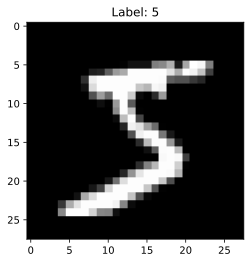

In [9]:
plt.imshow(X_train[0], cmap="gray")
plt.title(f"Label: {y_train[0]}")
plt.show()

In [10]:
# scale the data between 0 and 1 as well as convert all the array to PyTorch Tensors
X_train = torch.Tensor(X_train/255)
X_test  = torch.Tensor(X_test/255)

y_train = torch.Tensor(np.reshape(y_train, (y_train.shape[-1], 1)))
y_test = torch.Tensor(np.reshape(y_test, (y_test.shape[-1], 1)))

In [11]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([60000, 28, 28]),
 torch.Size([60000, 1]),
 torch.Size([10000, 28, 28]),
 torch.Size([10000, 1]))

## Regression model using PyTorch Sequential

In [10]:
# build model architecture
ANN_regressor = nn.Sequential(
    nn.Linear(in_features = X_train_scaled.shape[-1], out_features = 7),
    nn.ReLU(),
    nn.Linear(in_features = 7, out_features = 7),
    nn.ReLU(),
    nn.Linear(in_features = 7, out_features = 1)
)

ANN_regressor

Sequential(
  (0): Linear(in_features=7, out_features=7, bias=True)
  (1): ReLU()
  (2): Linear(in_features=7, out_features=7, bias=True)
  (3): ReLU()
  (4): Linear(in_features=7, out_features=1, bias=True)
)

In [ ]:
summary(ANN_regressor, input_size=(400, 7));

In [12]:
# learning_rate
learning_rate = 0.01

# loss function
lossfun = nn.MSELoss()

# optimizer
optimizer = torch.optim.Adam(ANN_regressor.parameters(), lr = learning_rate)

In [13]:
%%time

# train the model
epochs = 100
losses = torch.zeros(epochs)

for epoch in range(epochs):
    # forward propagation
    y_hat = ANN_regressor(X_train_scaled.float())
    
    # compute loss
    loss          = lossfun(y_hat, y_train.float())
    losses[epoch] = loss
    
    # back propagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

CPU times: total: 688 ms
Wall time: 130 ms


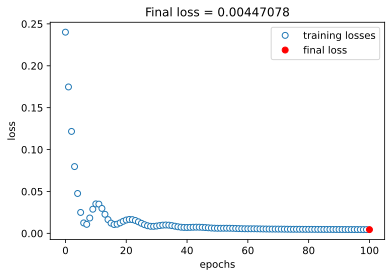

In [17]:
y_pred = ANN_regressor(X_train_scaled.float())

final_loss = lossfun(y_pred, y_train.float())

plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1, label="training losses")
plt.plot(epochs, final_loss.detach(), 'ro', label="final loss")
plt.title('Final loss = %g' %final_loss.item())
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

## Binary Classification Model
### Using Sequential Model

In [21]:
# convert the numpy arrays to PyTorch Tensors
X_train_scaled = torch.Tensor(X_train_scaled)
X_test_scaled  = torch.Tensor(X_test_scaled)

y_train = torch.tensor(np.reshape(y_train.values, (y_train.shape[-1], 1)))
y_test  = torch.tensor(np.reshape(y_test.values, (y_test.shape[-1], 1)))

X_train_scaled.shape, y_train.shape, X_test_scaled.shape, y_test.shape

(torch.Size([8000, 11]),
 torch.Size([8000, 1]),
 torch.Size([2000, 11]),
 torch.Size([2000, 1]))

In [79]:
# build model architecture
ANN_classify = nn.Sequential(
    nn.Linear(in_features = X_train_scaled.shape[-1], out_features = 11),
    nn.ReLU(),
    nn.Linear(in_features = 11, out_features = 11),
    nn.ReLU(),
    nn.Linear(in_features = 11, out_features = 1),
    nn.Sigmoid()
)

ANN_classify

Sequential(
  (0): Linear(in_features=11, out_features=11, bias=True)
  (1): ReLU()
  (2): Linear(in_features=11, out_features=11, bias=True)
  (3): ReLU()
  (4): Linear(in_features=11, out_features=1, bias=True)
  (5): Sigmoid()
)

In [ ]:
# summary of the model
summary(ANN_classify, input_size = X_train_scaled.shape);

In [80]:
# select the learning rate
learning_rate = 0.01

# define loss function
loss_func = nn.BCELoss()

# define the optimizer
optimizer = torch.optim.Adam(ANN_classify.parameters(), lr = learning_rate)

In [87]:
epochs = 100

losses = torch.zeros(epochs)

# Initial call to print 0% progress
printProgressBar(0, epochs, prefix = 'Progress:', suffix = 'Complete', length = 50)
for epoch in range(epochs):
    # forward propagation
    y_pred = ANN_classify(X_train_scaled)
    
    # compute loss
    loss = loss_func(y_pred, y_train.float())
    losses[epoch] = loss
    
    # backward propagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # calculate the accuracy
    y_label               = np.array(y_pred >= 0.5, dtype = np.int8)
    accuracy_score_inside = accuracy_score(y_train.detach().numpy(), y_label)
    
    # Update Progress Bar
    suffix = f"Complete - loss: {round(loss.item(), 5)} - accuracy: {accuracy_score_inside}"
    printProgressBar(epoch + 1, epochs, prefix = 'Progress:', suffix = suffix, length = 70)

Progress: |██████████████████████████████████████████████████████████████████████| 100.0% Complete - loss: 0.3794 - accuracy: 0.827755


In [88]:
# prediction time (the output is not 0 or 1, it is between 0 and 1, can see probability to be 1)
y_pred = ANN_classify(X_train_scaled)

# label our predictions
y_label = np.array(y_pred >= 0.5, dtype = np.int8)

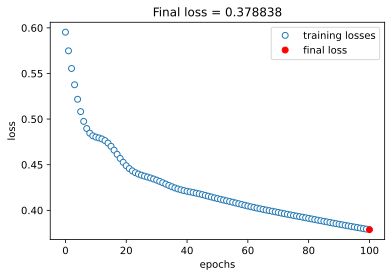

In [89]:
# display the loss
final_loss = loss_func(y_pred, y_train.float())

plt.plot(losses.detach(), 'o',markerfacecolor='w',linewidth=.1, label="training losses")
plt.plot(epochs, final_loss.detach(), 'ro', label="final loss")
plt.title('Final loss = %g' %final_loss.item())
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

In [90]:
# check the how much accurate our model
accuracy_score(y_train.detach().numpy(), y_label)

0.827875

### Using Class Model

In [33]:
class ANNBinary_Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        
        # model architecture
        self.input  = nn.Linear(in_features = X_train_scaled.shape[-1], out_features = 11)
        self.hidden = nn.Linear(in_features = 11, out_features = 11)
        self.output = nn.Linear(in_features = 11, out_features = 1)
        
    def forward(self, X_train):
        # pass through the input layer
        X = self.input(X_train)
        # apply ReLU activation function
        X = F.relu(X)
        
        # pass through the hidden layer
        X = self.hidden(X)
        # apply ReLU activation function
        X = F.relu(X)
        
        # pass through the output layer
        X = self.output(X)
        # apply Sigmoid activation function
        X = torch.sigmoid(X)
        
        return X

In [34]:
# create an instance of our model architecture
ANN_binary_classifier = ANNBinary_Classifier()

# set the learning rate
learning_rate = 0.01

# define the loss function
loss_func = nn.BCELoss()

# define the optimizer
optimizer = torch.optim.Adam(ANN_binary_classifier.parameters(), lr = learning_rate)

In [35]:
# train the model
epochs = 100
losses = torch.zeros(epochs)

# Initial call to print 0% progress
printProgressBar(0, epochs, prefix = 'Progress:', suffix = 'Complete', length = 50)
for epoch in range(epochs):
    # forward propagation
    yHat = ANN_binary_classifier(X_train_scaled.float())
    
    # compute loss
    loss          = loss_func(yHat, y_train.float())
    losses[epoch] = loss
    
    # backward propagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # calculate the accuracy
    y_label               = np.array(yHat >= 0.5, dtype = np.int8)
    accuracy_score_inside = accuracy_score(y_train.detach().numpy(), y_label)
    
    # Update Progress Bar
    suffix = f"Complete - loss: {round(loss.item(), 5)} - accuracy: {accuracy_score_inside}"
    printProgressBar(epoch + 1, epochs, prefix = 'Progress:', suffix = suffix, length = 70)

Progress: |██████████████████████████████████████████████████████████████████████| 100.0% Complete - loss: 0.41112 - accuracy: 0.82825


In [37]:
# prediction time (the output is not 0 or 1, it is between 0 and 1, can see probability to be 1)
y_pred = ANN_binary_classifier(X_train_scaled)

# label our predictions
y_label = np.array(y_pred >= 0.5, dtype = np.int8)

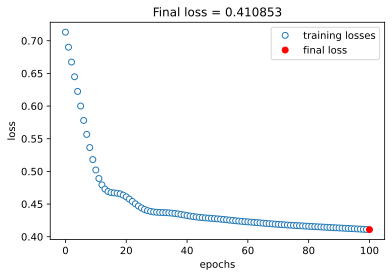

In [38]:
# display the loss
final_loss = loss_func(y_pred, y_train.float())

plt.plot(losses.detach(), 'o',markerfacecolor='w',linewidth=.1, label="training losses")
plt.plot(epochs, final_loss.detach(), 'ro', label="final loss")
plt.title('Final loss = %g' %final_loss.item())
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

In [39]:
# check the how much accurate our model
accuracy_score(y_train.detach().numpy(), y_label)

0.82825

## Multiclass Classification model using Sequential

In [126]:
# build model architecture
ANN_multi_classify = nn.Sequential(
    nn.Flatten(1, 2),
    nn.Linear(in_features = X_train.shape[1] * X_train.shape[2], out_features = 128),
    nn.ReLU(),
    nn.Linear(in_features = 128, out_features = 10),
    # Don't need to pass the SoftMax activation muction. While defining the loss function
    # SoftMax activation function will be implemented automatically
)

ANN_multi_classify

Sequential(
  (0): Flatten(start_dim=1, end_dim=2)
  (1): Linear(in_features=784, out_features=128, bias=True)
  (2): ReLU()
  (3): Linear(in_features=128, out_features=10, bias=True)
)

In [ ]:
summary(ANN_multi_classify, input_size = (X_train.shape[0], X_train.shape[1] * X_train.shape[2]));

In [127]:
# define our learning rate
learning_rate = 0.01

# define loss function. It wil automatically handle the SoftMax activation function
loss_func = nn.CrossEntropyLoss()  # similar to TensorFlow "sparse_categorical_crossentropy"

# define optimizer
optimizer = torch.optim.Adam(ANN_multi_classify.parameters(), lr = learning_rate)

In [144]:
epochs = 1000
losses = torch.zeros(epochs)

# y_train = torch.reshape(y_train, (y_train.shape[0]))

# Initial call to print 0% progress
printProgressBar(0, epochs, prefix = 'Progress:', suffix = 'Complete', length = 50)
for epoch in range(epochs):
    # forward propagation
    y_pred = ANN_multi_classify(X_train.float())
    
    # calculate loss
    loss          = loss_func(y_pred.squeeze(-1), y_train.long())
    losses[epoch] = loss
    
    # backward propagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Update Progress Bar
    suffix = f"Complete - epoch: {epoch + 1}/{epochs} - loss: {round(loss.item(), 5)}"
    printProgressBar(epoch + 1, epochs, prefix = 'Progress:', suffix = suffix, length = 70)

Progress: |██████████████████████████████████████████████████████████████████████| 100.0% Complete - epoch: 1000/1000 - loss: 0.00027


In [147]:
# model prediction (probability of every class of an input data)
y_probability = ANN_multi_classify(X_train.float())
# find which class has maximum probability to be according to the model
y_pred = torch.argmax(y_probability, axis = 1)

# calculate the accuracy score of our model
accuracy_score(y_train, y_pred.detach().numpy())

1.0

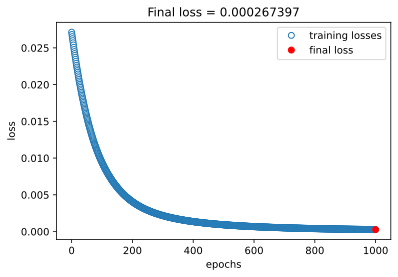

In [148]:
# display the loss
final_loss = loss_func(y_probability.squeeze(-1), y_train.long())

plt.plot(losses.detach(), 'o',markerfacecolor='w',linewidth=.1, label="training losses")
plt.plot(epochs, final_loss.detach(), 'ro', label="final loss")
plt.title('Final loss = %g' %final_loss.item())
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

In [2]:
class ANN_Model(nn.Module):
    def __init__(self, *args):
        super().__init__()
        
        # create directory to store the layers
        self.layers  = nn.ModuleDict()
        self.nLayers = None
        
        # calculate the hidden layers number
        if len(args) > 2:
            self.nLayers = len(args) - 3
        
        # input layer
        self.layers["input"] = nn.Linear(in_features = args[0], out_features = args[1])
        
        # if there are hidden layers
        if self.nLayers != None:
            for i in range(self.nLayers):
                self.layers[f"hidden{i}"] = nn.Linear(in_features = args[i + 1], out_features = args[i+2])
            
        # output layer
        self.layers["output"] = nn.Linear(in_features = args[-2], out_features = args[-1])
        
    
    # forward propagation
    def forward(self, X: torch.Tensor, activation = F.relu, output_activation = None):
        # input layer
        X = F.relu( self.layers["input"](x) )
        
        # hidden layers
        for i in range(self.nLayers):
            X = activation( self.layers[f"hidden{i}"](X) )
        
        # output layer
        X = self.layers["output"](x)
        # pass through the output activation function
        if output_activation != None:
            X = output_activation(X)
        
        return X

In [70]:
ANN_Model(*[5, 7, 5, 3, 1])

ANN_Model(
  (layers): ModuleDict(
    (input): Linear(in_features=5, out_features=7, bias=True)
    (hidden0): Linear(in_features=7, out_features=5, bias=True)
    (hidden1): Linear(in_features=5, out_features=3, bias=True)
    (output): Linear(in_features=3, out_features=1, bias=True)
  )
)

In [5]:
class Train_Model:
    def __init__(self, model, x, y, prob = "regression"):
        self.model = model
        self.x     = x
        self.y     = y
        self.prob  = prob
        
    # for the progress bar
    def _printProgressBar (self, iteration, total, prefix = '', suffix = '', decimals = 1, length = 100, fill = '█', printEnd = "\r"):
        """
        Call in a loop to create terminal progress bar
        @params:
            iteration   - Required  : current iteration (Int)
            total       - Required  : total iterations (Int)
            prefix      - Optional  : prefix string (Str)
            suffix      - Optional  : suffix string (Str)
            decimals    - Optional  : positive number of decimals in percent complete (Int)
            length      - Optional  : character length of bar (Int)
            fill        - Optional  : bar fill character (Str)
            printEnd    - Optional  : end character (e.g. "\r", "\r\n") (Str)
        """
        percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
        filledLength = int(length * iteration // total)
        bar = fill * filledLength + '-' * (length - filledLength)
        print(f'\r{prefix} |{bar}| {percent}% {suffix}', end = printEnd)
        # Print New Line on Complete
        if iteration == total: 
            print()
        
    def compile(self, loss_func = nn.MSELoss, optimizer = torch.optim.Adam, learning_rate = 0.01):
        self.loss_func = loss_func()
        self.optimizer = optimizer(self.model.parameters(), lr = learning_rate)
        
    def fit(self, epochs):
        losses = torch.zeros(epochs)
        
        # Initial call to print 0% progress
        printProgressBar(0, epochs, prefix = 'Progress:', suffix = 'Complete', length = 50)
        for epoch in epochs:
            # forward propagation
            yHat = self.model(self.x)
            
            # compute loss
            loss = self.loss_func(yHat, y)
            losses[epoch] = loss
            
            # backward propagation
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            # compute accuracy_score/r2_score
            if self.prob == "classification":
                y_pred   = torch.argmax(yHat, axis = 1)
                accuracy = accuracy_score(self.y, y_pred.detach().numpy())
            elif self.prob == "regression":
                accuracy = r2_score(self.y, yHat.detach().numpy())
            
            # Update Progress Bar
            suffix = f"Complete - epoch: {epoch + 1}/{epochs} - loss: {round(loss.item(), 5)} - accuracy: {accuracy}"
            printProgressBar(epoch + 1, epochs, prefix = 'Progress:', suffix = suffix, length = 70)
            
    def predict(self, x):
        predictions = self.model(x)